In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np 
import matplotlib.pyplot as plt 

## Get MNIST Data. 
### MNIST data loacted in tensorflow > keras > datasets > mnist 
### Split data to (train images, train labels) and (test images, test labels)

In [6]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### There are Total 60000 Train images and Train labels. (6000 images for single class)
### Shape of single image is 28 x 28 (pixel)

In [7]:
print('Shape of Train images :',train_images.shape)
print('Shape of Train labels : ', train_labels.shape)
print('\nShape of Test images : ', test_images.shape)
print("Shape of Test labels : ",test_labels.shape)

Shape of Train images : (60000, 28, 28)
Shape of Train labels :  (60000,)

Shape of Test images :  (10000, 28, 28)
Shape of Test labels :  (10000,)


In [8]:
print('Train labels : ',train_labels)

Train labels :  [5 0 4 ... 5 6 8]


## Plot first train image.
### when value is close to 0 : dark
### when value is close to 255 : white

In [9]:
print(train_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

### Plot First 10 Train images and Corresponding labels  

First 10 Train images in MNIST dataset



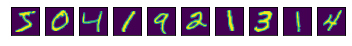


Train labels match with Train label sequentialy
 [5 0 4 1 9 2 1 3 1 4]


In [10]:
print('First 10 Train images in MNIST dataset\n')
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()
print('\nTrain labels match with Train label sequentialy\n',train_labels[:10])



## Important
### Change data shape (60000 x 28 x 28) to (60000 x 28 x 28 x 1)


In [11]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

# Select one convolution model below 
## There are 3 example models. 
## 3, 5, 7 layer each 
## MODEL 1 : 3 Layers with 1 Convolution layer  
## MODEL 2 : 5 Layers with 2 Convolution layer 
## MODEL 3 : 7 Layers with 4 Convolution layer 

In [12]:
model_1 = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2 
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')]) 
model_2 = model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),     # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 4
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 5
model_3 = model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 4
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 5
                    keras.layers.Conv2D(128, (3,3), activation = 'relu'),                           # layer 6
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 7

In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

In [15]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

## Components in training step 
### Optimizer, Loss function, accuracy metrics 

In [16]:
model_1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model_2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model_3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Training Step 
## Training for 5 epochs. 

In [17]:
model_1.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8036 - accuracy: 0.9394
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0862 - accuracy: 0.9752
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0720 - accuracy: 0.9785
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0594 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0535 - accuracy: 0.9834


In [18]:
model_2.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4008 - accuracy: 0.9417
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0747 - accuracy: 0.9786
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0611 - accuracy: 0.9820
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0526 - accuracy: 0.9847
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0451 - accuracy: 0.9866


In [19]:
model_3.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1838 - accuracy: 0.9557
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0577 - accuracy: 0.9829
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0450 - accuracy: 0.98630s - loss: 0
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0393 - accuracy: 0.9879
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0337 - accuracy: 0.9897


## Test Step 
## Perform Test with Test data 

### Model_1

In [21]:
test_loss, accuracy = model_1.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 0s - loss: 0.1648 - accuracy: 0.9695

Test loss :  0.1647561937570572
Test accuracy : 0.9695000052452087


### Model_2

In [22]:
test_loss, accuracy = model_2.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 1s - loss: 0.0486 - accuracy: 0.9850

Test loss :  0.048633918166160583
Test accuracy : 0.9850000143051147


### Model_3

In [28]:
test_loss, accuracy = model_3.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 1s - loss: 0.0503 - accuracy: 0.9838

Test loss :  0.050306063145399094
Test accuracy : 0.9837999939918518


## Before prediction, change test image's type to float 32. 

In [29]:
test_images = tf.cast(test_images, tf.float32)
pred_1 = model_1.predict(test_images)
pred_2 = model_2.predict(test_images)
pred_3 = model_3.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

In [30]:
print('Prediction : ', pred_1.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


## Functions for plot images, probability

In [31]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                100*np.max(predictions_array),
                                Number[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.xticks(Number)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [36]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Success Case

### Model_1

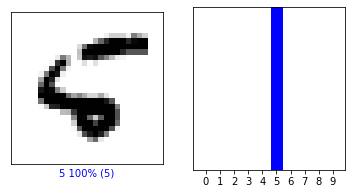

In [56]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred_1, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred_1,  test_labels)
plt.show()

### Model_2

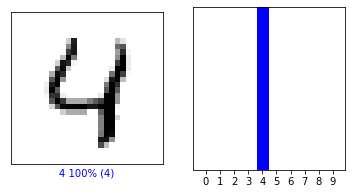

In [57]:
i = 4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred_2, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred_2,  test_labels)
plt.show()

### Model_3

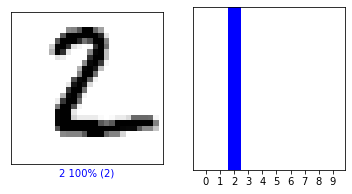

In [58]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred_3, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred_3,  test_labels)
plt.show()

## Plot images and probability that model predicted wrong

In [46]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

## Find index of wrong prediction
## Plot first 10 wrong predicted images and probability

In [51]:
index_1 = error_mnist(pred_1, test_labels)
index_slice_1 = index_1[:10]
print('model_1 : ')
print(index_1[:10])
index_2 = error_mnist(pred_2, test_labels)
index_slice_2 = index_2[:10]
print('model_2 : ')
print(index_2[:10])
index_3 = error_mnist(pred_3, test_labels)
index_slice_3 = index_3[:10]
print('model_3 : ')
print(index_3[:10])

model_1 : 
[73, 221, 224, 247, 259, 282, 321, 326, 340, 381]
model_2 : 
[151, 321, 340, 359, 417, 448, 449, 582, 583, 646]
model_3 : 
[62, 111, 115, 175, 247, 259, 300, 411, 413, 415]


### Model_1 Errors

model_1 : 


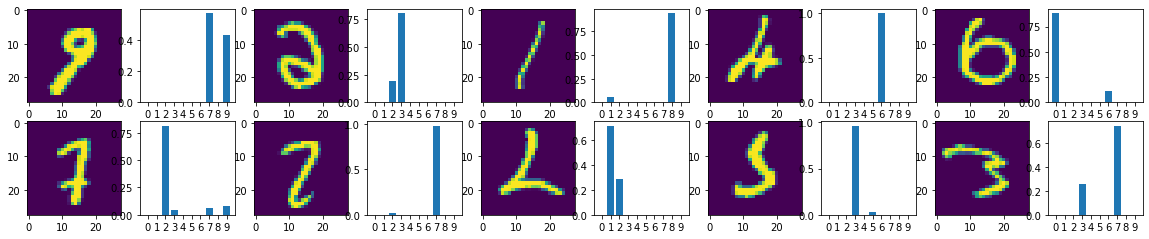

In [52]:
print('model_1 : ')
plot_error(index_slice_1, pred_1, test_labels)

### Model_2 Errors

model_2 : 


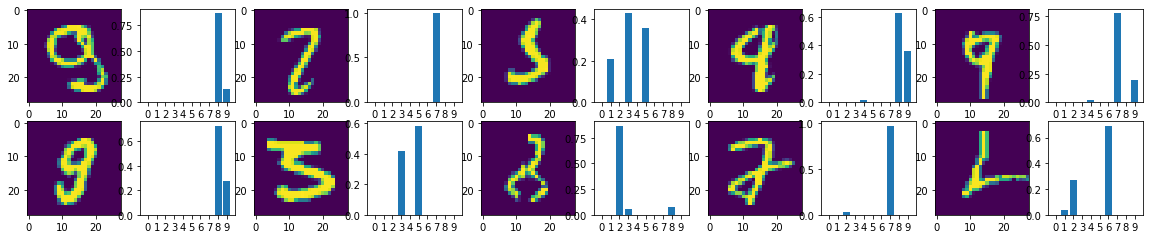

In [53]:
print('model_2 : ')
plot_error(index_slice_2, pred_2, test_labels)

### Model_3 Errors

model_3 : 


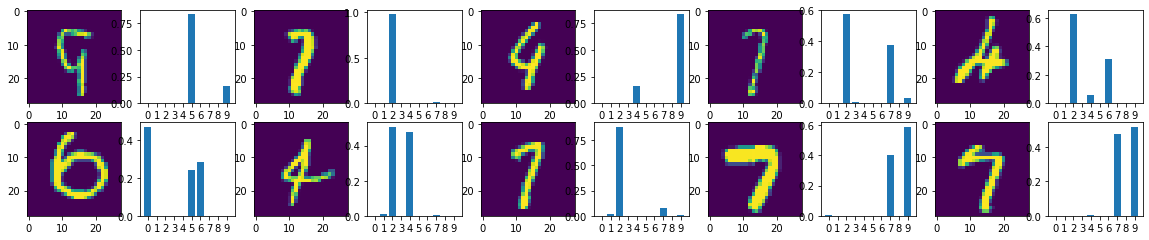

In [54]:
print('model_3 : ')
plot_error(index_slice_3, pred_3, test_labels)

In [55]:
print('20193494 문서형')

20193494 문서형
